In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('googleplaystore.csv', encoding='ISO/8859/1')

In [3]:
# Cleaning the dataframe to make it machine understandable

df.drop(df.loc[df['Size'] == 'Varies with device'].index,inplace = True)

#Remove them inorder to convert the size column to numerics
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M',''))
df['Size'] = df['Size'].apply(lambda x: str(x).replace('k',''))
df['Size'] = df['Size'].apply(lambda x: str(x).replace('+',''))

Text(0, 0.5, 'Size')

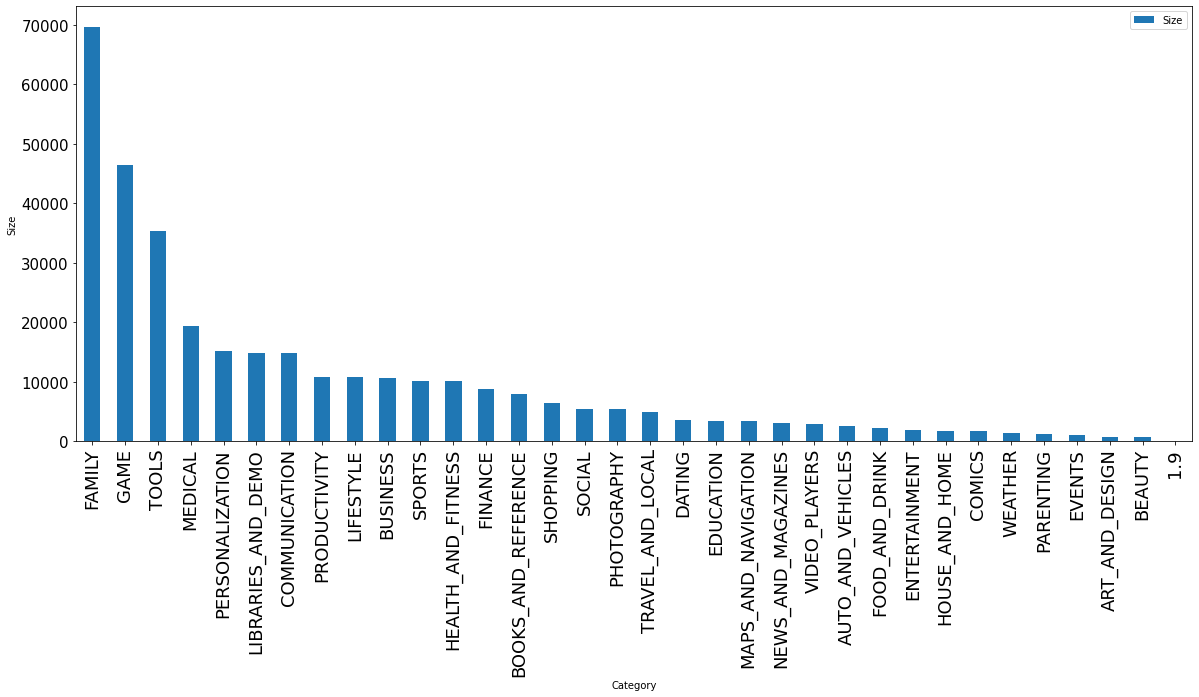

In [4]:
# Question 1

#Converting Size column to numerics
df['Size'] = pd.to_numeric(df['Size'],errors='coerce')
res = df.groupby('Category')['Size'].sum().reset_index()
finaldata = res.sort_values('Size', ascending=False).reset_index(drop=True)

ind = finaldata.set_index("Category", inplace = True)
bar = finaldata.plot(kind='bar',figsize=(20,8))
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 18)
plt.xlabel("Category")
plt.ylabel("Size")

In [5]:
# Question 2

df.drop(df.loc[df['Size'] == 'Varies with device'].index,inplace = True)
df.drop(df.loc[df['Installs'] == 'Free'].index, inplace=True)
df['Installs'] = df['Installs'].apply(lambda x: float(x.split("+")[0].replace(",","")))

df['Size'] = pd.to_numeric(df['Size'],errors='coerce')
counter = 0

print('top 5 largest apps with installs more than 1 Million are :-', end='\n\n')
for i in range(len(df)):
    if df.sort_values('Size', ascending=False).iloc[i]['Installs'] > 1000000:
        print(df.sort_values('Size', ascending=False).iloc[i]['App'])
        counter += 1
    if counter == 5:
        break

top 5 largest apps with installs more than 1 Million are :-

Galactic Core Free Wallpaper
GO Notifier
Aviary Stickers: Free Pack
Terminal Emulator for Android
Screen Off and Lock


In [6]:
# Question 3

df['Last Updated Year'] = df['Last Updated'].iloc[0].split(', ')[1]

for i in range(len(df)):
    df['Last Updated Year'].iloc[i] = df['Last Updated'].iloc[i].split(', ')[1]
df['Last Updated Year'] = pd.to_numeric(df['Last Updated Year'],errors='coerce')

print('Most Installed app with last update before 2016 is', end=' ')
for i in range(len(df)):
    if df.sort_values('Installs', ascending=False).iloc[i]['Last Updated Year'] < 2016:
        print(df.sort_values('Installs', ascending=False).iloc[i]['App'])
        break

Most Installed app with last update before 2016 is Smash Hit


In [7]:
# Question 4

most_installed = df.groupby('Category').sum().sort_values(by=['Installs'], ascending=False)
print(f'most installed app category is {most_installed.index[0]}')

most installed app category is GAME


In [8]:
# Question 5

free_ratings = df[df['Type'] == 'Free']['Rating']
free_ratings.dropna(inplace=True)
sum_of_ratings_of_free_apps = 0
for i in range(len(free_ratings)):
    sum_of_ratings_of_free_apps +=  free_ratings.iloc[i]


paid_ratings = df[df['Type'] == 'Paid']['Rating']
paid_ratings.dropna(inplace=True)
sum_of_ratings_of_paid_apps = 0
for i in range(len(paid_ratings)):
    sum_of_ratings_of_paid_apps +=  paid_ratings.iloc[i]

avg_of_free_apps_rating = sum_of_ratings_of_free_apps / len(df[df['Type'] == 'Free'])
avg_of_paid_apps_rating = sum_of_ratings_of_paid_apps / len(df[df['Type'] == 'Paid'])
print(f"average app rating for free app is {avg_of_free_apps_rating}")
print(f"average app rating for paid app is {avg_of_paid_apps_rating}")

print('\n')
print(f'difference in average apps rating is {np.abs(avg_of_free_apps_rating - avg_of_paid_apps_rating)}')

average app rating for free app is 3.538463365396034
average app rating for paid app is 3.400966850828728


difference in average apps rating is 0.13749651456730616


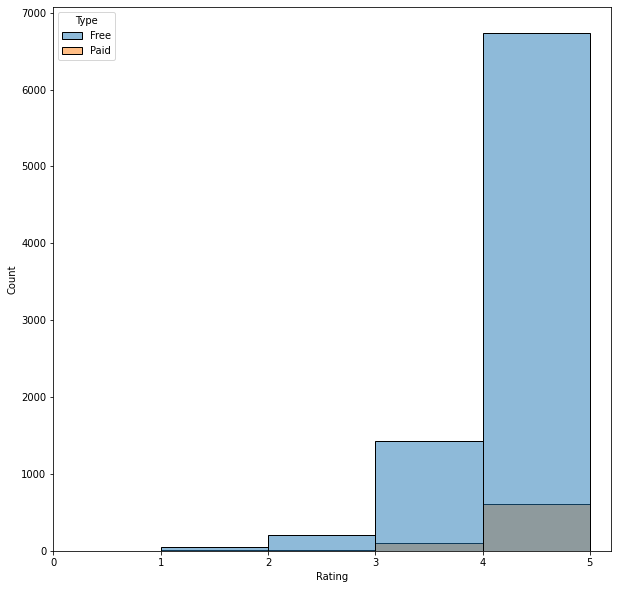

In [9]:
# Question 5

df.Rating.fillna(df.Rating.mean(), inplace=True)

for i in range(len(df)):
    df['Rating'].iloc[i] = math.floor(df.Rating.iloc[i])

plt.figure(figsize=(10, 10))
sns.histplot(data=df, x=df['Rating'], hue=df['Type'], binwidth=1)
plt.xticks(range(0, 6))
plt.show()